In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.io
from scipy import interpolate, ndimage, datasets
import os
import pandas as pd
import collections
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import math
import cv2



In [2]:
file_path = Path('TAF Fiber Modes only Farfield.csv')
#
# file_path

root = tk.Tk()
root.withdraw()

# ask the user to select a file
# file_path = filedialog.askopenfilename(filetypes=[('CSV files', '*.csv')])

file_path

WindowsPath('TAF Fiber Modes only Farfield.csv')

In [3]:

# read the CSV file into a pandas dataframe
df = pd.read_csv(file_path)


In [4]:
df.drop('farfield1_exact_Ey(real)', axis=1, inplace=True)
df.drop('farfield1_exact_Ey(imag)', axis=1, inplace=True)
df.drop('farfield1_exact_Ez(imag)', axis=1, inplace=True)
df.drop('farfield1_exact_Ez(real)', axis=1, inplace=True)
df.drop('farfield1_exact_Hx(imag)', axis=1, inplace=True)
df.drop('farfield1_exact_Hx(real)', axis=1, inplace=True)
df.drop('farfield1_exact_Hy(imag)', axis=1, inplace=True)
df.drop('farfield1_exact_Hy(real)', axis=1, inplace=True)
df.drop('farfield1_exact_Hz(imag)', axis=1, inplace=True)
df.drop('farfield1_exact_Hz(real)', axis=1, inplace=True)

df.drop('farfield3_exact_Ey(real)', axis=1, inplace=True)
df.drop('farfield3_exact_Ey(imag)', axis=1, inplace=True)
df.drop('farfield3_exact_Ez(imag)', axis=1, inplace=True)
df.drop('farfield3_exact_Ez(real)', axis=1, inplace=True)
df.drop('farfield3_exact_Hx(imag)', axis=1, inplace=True)
df.drop('farfield3_exact_Hx(real)', axis=1, inplace=True)
df.drop('farfield3_exact_Hy(imag)', axis=1, inplace=True)
df.drop('farfield3_exact_Hy(real)', axis=1, inplace=True)
df.drop('farfield3_exact_Hz(imag)', axis=1, inplace=True)
df.drop('farfield3_exact_Hz(real)', axis=1, inplace=True)

df.drop('farfield4_exact_Ey(real)', axis=1, inplace=True)
df.drop('farfield4_exact_Ey(imag)', axis=1, inplace=True)
df.drop('farfield4_exact_Ez(imag)', axis=1, inplace=True)
df.drop('farfield4_exact_Ez(real)', axis=1, inplace=True)
df.drop('farfield4_exact_Hx(imag)', axis=1, inplace=True)
df.drop('farfield4_exact_Hx(real)', axis=1, inplace=True)
df.drop('farfield4_exact_Hy(imag)', axis=1, inplace=True)
df.drop('farfield4_exact_Hy(real)', axis=1, inplace=True)
df.drop('farfield4_exact_Hz(imag)', axis=1, inplace=True)
df.drop('farfield4_exact_Hz(real)', axis=1, inplace=True)

In [5]:
df

,far_x,far_y,farfield1_exact_Ex(real),farfield1_exact_Ex(imag),farfield3_exact_Ex(real),farfield3_exact_Ex(imag),farfield4_exact_Ex(real),farfield4_exact_Ex(imag)
0,-0.001250,-0.00125,-0.000052,0.000058,-0.000009,-0.000006,0.000010,0.000006
1,-0.001245,-0.00125,-0.000049,-0.000061,0.000009,-0.000010,-0.000009,0.000010
2,-0.001240,-0.00125,0.000069,-0.000037,0.000009,0.000013,-0.000009,-0.000013
3,-0.001235,-0.00125,0.000023,0.000075,-0.000017,0.000007,0.000017,-0.000007
4,-0.001230,-0.00125,-0.000079,0.000006,-0.000004,-0.000021,0.000004,0.000021
...,...,...,...,...,...,...,...,...
249995,0.001230,0.00125,-0.000079,0.000006,0.000004,0.000021,-0.000004,-0.000021
249996,0.001235,0.00125,0.000023,0.000075,0.000017,-0.000007,-0.000017,0.000007
249997,0.001240,0.00125,0.000069,-0.000037,-0.000009,-0.000013,0.000009,0.000013
249998,0.001245,0.00125,-0.000049,-0.000061,-0.000009,0.000010,0.000009,-0.000010


In [6]:
df['farfield1_exact_Ex_power'] = np.abs(df['farfield1_exact_Ex(real)'] + 1j * df['farfield1_exact_Ex(imag)'])

df['farfield3_exact_Ex_power'] = np.abs(df['farfield3_exact_Ex(real)'] + 1j * df['farfield3_exact_Ex(imag)'])

df['farfield4_exact_Ex_power'] = np.abs(df['farfield4_exact_Ex(real)'] + 1j * df['farfield4_exact_Ex(imag)'])

In [7]:
df

,far_x,far_y,farfield1_exact_Ex(real),farfield1_exact_Ex(imag),farfield3_exact_Ex(real),farfield3_exact_Ex(imag),farfield4_exact_Ex(real),farfield4_exact_Ex(imag),farfield1_exact_Ex_power,farfield3_exact_Ex_power,farfield4_exact_Ex_power
0,-0.001250,-0.00125,-0.000052,0.000058,-0.000009,-0.000006,0.000010,0.000006,0.000078,0.000011,0.000011
1,-0.001245,-0.00125,-0.000049,-0.000061,0.000009,-0.000010,-0.000009,0.000010,0.000078,0.000013,0.000014
2,-0.001240,-0.00125,0.000069,-0.000037,0.000009,0.000013,-0.000009,-0.000013,0.000078,0.000016,0.000016
3,-0.001235,-0.00125,0.000023,0.000075,-0.000017,0.000007,0.000017,-0.000007,0.000079,0.000018,0.000018
4,-0.001230,-0.00125,-0.000079,0.000006,-0.000004,-0.000021,0.000004,0.000021,0.000079,0.000021,0.000021
...,...,...,...,...,...,...,...,...,...,...,...
249995,0.001230,0.00125,-0.000079,0.000006,0.000004,0.000021,-0.000004,-0.000021,0.000079,0.000021,0.000021
249996,0.001235,0.00125,0.000023,0.000075,0.000017,-0.000007,-0.000017,0.000007,0.000079,0.000018,0.000018
249997,0.001240,0.00125,0.000069,-0.000037,-0.000009,-0.000013,0.000009,0.000013,0.000078,0.000016,0.000016
249998,0.001245,0.00125,-0.000049,-0.000061,-0.000009,0.000010,0.000009,-0.000010,0.000078,0.000013,0.000014


In [8]:
farfield1_exact_Ex_power_pivot = df.pivot(index='far_y', columns='far_x', values='farfield1_exact_Ex_power')

farfield3_exact_Ex_power_pivot = df.pivot(index='far_y', columns='far_x', values='farfield3_exact_Ex_power')

farfield4_exact_Ex_power_pivot = df.pivot(index='far_y', columns='far_x', values='farfield4_exact_Ex_power')

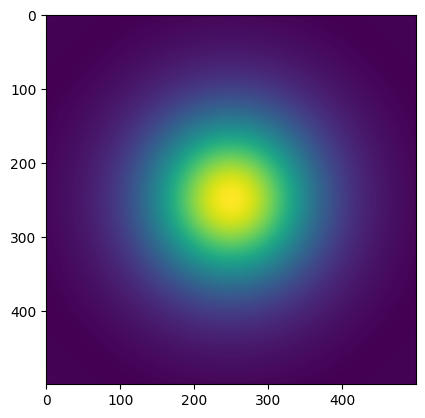

In [9]:
plt.imshow(farfield1_exact_Ex_power_pivot.values)

In [10]:
def polar_to_rect(r, phi):
    return r * (np.cos(phi) + np.sin(phi) * 1j)

In [18]:
farfield1_power = .2

farfield3_power = .5
farfield3_phase = 0

farfield4_power = .5
farfield4_phase = 0

farfield1_exact_Ex_power_pivot_complex = farfield1_exact_Ex_power_pivot.values * farfield1_power

farfield3_exact_Ex_power_pivot_modulus = farfield3_exact_Ex_power_pivot.values * farfield3_power
farfield3_exact_Ex_power_pivot_angle = np.full_like(farfield3_exact_Ex_power_pivot_modulus, farfield3_phase)
farfield3_exact_Ex_power_pivot_complex = polar_to_rect(farfield3_exact_Ex_power_pivot_modulus,
                                                       farfield3_exact_Ex_power_pivot_angle)

farfield4_exact_Ex_power_pivot_modulus = farfield4_exact_Ex_power_pivot.values * farfield4_power
farfield4_exact_Ex_power_pivot_angle = np.full_like(farfield4_exact_Ex_power_pivot_modulus, farfield4_phase)
farfield4_exact_Ex_power_pivot_complex = polar_to_rect(farfield4_exact_Ex_power_pivot_modulus,
                                                       farfield4_exact_Ex_power_pivot_angle)

farfield_total_exact_Ex_power_pivot_complex = farfield1_exact_Ex_power_pivot_complex + farfield3_exact_Ex_power_pivot_complex + farfield4_exact_Ex_power_pivot_complex

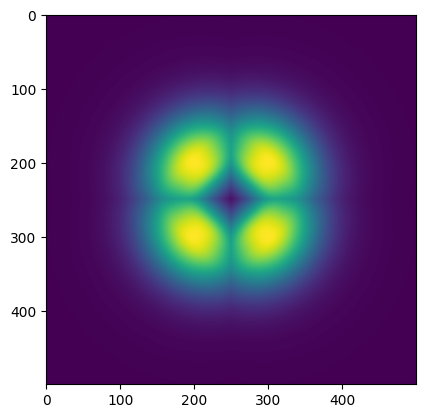

In [19]:
result_image_1 = np.square(np.abs(farfield_total_exact_Ex_power_pivot_complex))
plt.imshow(result_image_1)

In [20]:
farfield1_exact_Ex_power_pivot_intensity = np.square(farfield1_exact_Ex_power_pivot.values) * farfield1_power

farfield3_exact_Ex_power_pivot_intensity = np.square(farfield3_exact_Ex_power_pivot.values) * farfield3_power
# farfield3_exact_Ex_power_pivot_angle = np.full_like(farfield3_exact_Ex_power_pivot_modulus, farfield3_phase)
# farfield3_exact_Ex_power_pivot_complex = polar_to_rect(farfield3_exact_Ex_power_pivot_modulus, farfield3_exact_Ex_power_pivot_angle)

farfield4_exact_Ex_power_pivot_intensity = np.square(farfield4_exact_Ex_power_pivot.values) * farfield4_power
# farfield4_exact_Ex_power_pivot_angle = np.full_like(farfield4_exact_Ex_power_pivot_modulus, farfield4_phase)
# farfield4_exact_Ex_power_pivot_complex = polar_to_rect(farfield4_exact_Ex_power_pivot_modulus, farfield4_exact_Ex_power_pivot_angle)

farfield_total_exact_Ex_power_pivot_intensity_13 = farfield1_exact_Ex_power_pivot_intensity + farfield3_exact_Ex_power_pivot_intensity + 2 * np.sqrt(
    farfield1_exact_Ex_power_pivot_intensity * farfield3_exact_Ex_power_pivot_intensity) * np.cos(farfield3_phase)

farfield_total_exact_Ex_power_pivot_intensity = farfield_total_exact_Ex_power_pivot_intensity_13 + farfield4_exact_Ex_power_pivot_intensity + 2 * np.sqrt(
    farfield_total_exact_Ex_power_pivot_intensity_13 * farfield4_exact_Ex_power_pivot_intensity) * np.cos(
    farfield4_phase)

# farfield_total_exact_Ex_power_pivot_intensity_2 = farfield1_exact_Ex_power_pivot_intensity + farfield3_exact_Ex_power_pivot_intensity + farfield4_exact_Ex_power_pivot_intensity + 2 * np.sqrt(farfield1_exact_Ex_power_pivot_intensity * farfield3_exact_Ex_power_pivot_intensity) * np.cos(farfield3_phase) + 2 * np.sqrt(farfield1_exact_Ex_power_pivot_intensity * farfield4_exact_Ex_power_pivot_intensity) * np.cos(farfield4_phase) + 2 * np.sqrt(farfield3_exact_Ex_power_pivot_intensity * farfield4_exact_Ex_power_pivot_intensity) * np.cos(farfield3_phase - farfield4_phase)

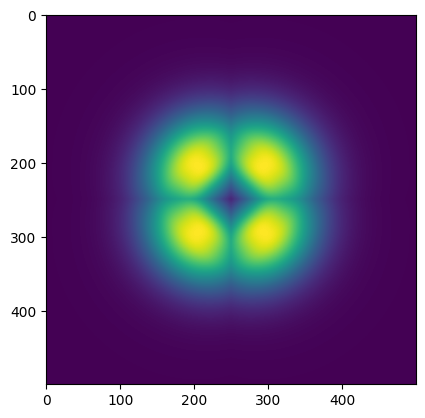

In [21]:
result_image_2 = np.abs(farfield_total_exact_Ex_power_pivot_intensity)
plt.imshow(result_image_2)

In [49]:
def transform_image(image, scale=1.0, angle=0.0, translation=(0, 0)):
    angle_rad = np.radians(angle)
    c, s = np.cos(angle_rad), np.sin(angle_rad)
    rot_matrix = np.array([[c, s],
                              [-s, c]])


    img_shape = np.asarray(image.shape)
    in_plane_shape  = img_shape[0]
    out_plane_shape = img_shape[0]

    out_center = ((out_plane_shape - 1) / 2)
    in_center = (in_plane_shape - 1) / 2
    offset = in_center - out_center

    # Define the affine transform matrix
    transform_matrix = np.array([[np.cos(angle_rad), np.sin(angle_rad), 0],
                                 [-np.sin(angle_rad), np.cos(angle_rad), 0],
                                 [0, 0, 1]])

    # Apply the transform using ndimage affine transform
    transformed_image = ndimage.affine_transform(image, transform_matrix, offset=offset)

    return transformed_image


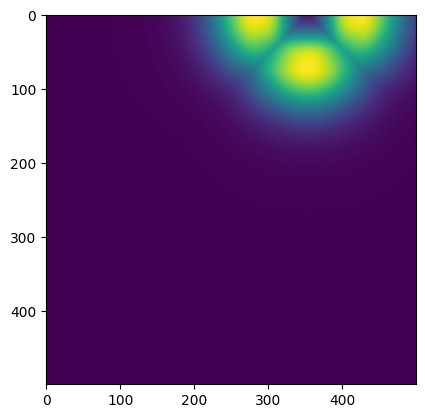

In [50]:
transform = transform_image(result_image_1, 1, 45, (0,0))
plt.imshow(transform)

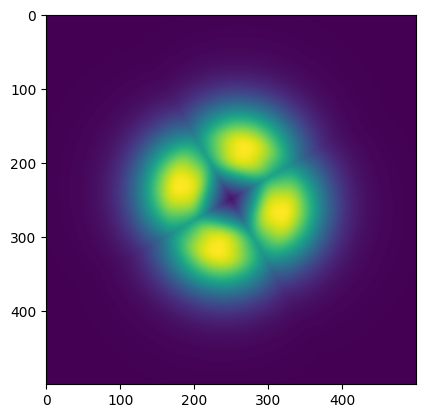

In [51]:
rotate_45 = ndimage.rotate(result_image_1, 30, reshape=False)
plt.imshow(rotate_45)

In [56]:
def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = ndimage.zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = ndimage.zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

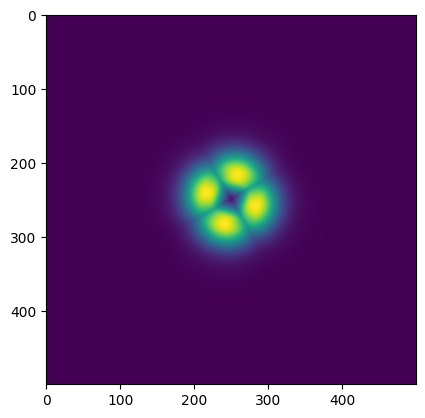

In [59]:

rotate_45_zoom = clipped_zoom(rotate_45, .5)
plt.imshow(rotate_45_zoom)

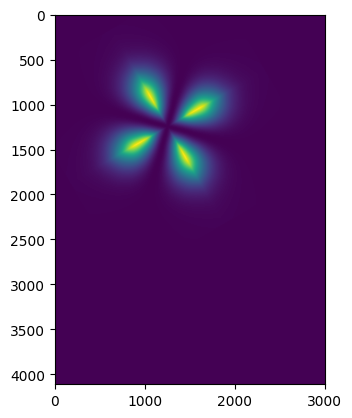

In [210]:
full_image = np.zeros([4112, 3008])
pad_x = full_image.shape[0] - rotate_45_zoom.shape[0]
pad_y = full_image.shape[1] - rotate_45_zoom.shape[1]
full_image = full_image + np.pad(rotate_45_zoom, ((0, pad_x), (0, pad_y)), 'minimum')
plt.imshow(full_image)

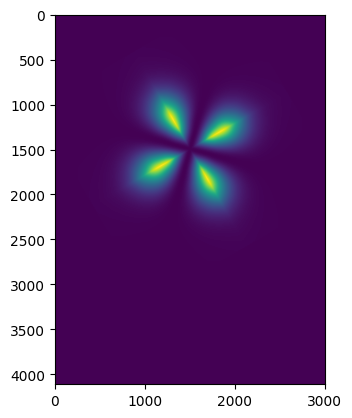

In [211]:
full_image_shift = ndimage.shift(full_image, (250, 250), cval=0)
plt.imshow(full_image_shift)

In [3]:
import random

In [4]:
ranges = ((0, 1), (0, 1), (0, 2 * math.pi), (0, 1), (0, 2 * math.pi))

In [16]:
i = [
    np.linspace(ranges[0][0], ranges[0][1], 3),
    np.linspace(ranges[1][0], ranges[1][1], 3),
    np.linspace(ranges[2][0], ranges[2][1], 3),
    np.linspace(ranges[3][0], ranges[3][1], 3),
    np.linspace(ranges[4][0], ranges[4][1], 3),
    # [45],
    # [3],
    # [500],
    # [500],

]

In [6]:
import itertools

In [17]:
points = list(itertools.product(*i))
points

[(0.0, 0.0, 0.0, 0.0, 0.0),
 (0.0, 0.0, 0.0, 0.0, 3.141592653589793),
 (0.0, 0.0, 0.0, 0.0, 6.283185307179586),
 (0.0, 0.0, 0.0, 0.5, 0.0),
 (0.0, 0.0, 0.0, 0.5, 3.141592653589793),
 (0.0, 0.0, 0.0, 0.5, 6.283185307179586),
 (0.0, 0.0, 0.0, 1.0, 0.0),
 (0.0, 0.0, 0.0, 1.0, 3.141592653589793),
 (0.0, 0.0, 0.0, 1.0, 6.283185307179586),
 (0.0, 0.0, 3.141592653589793, 0.0, 0.0),
 (0.0, 0.0, 3.141592653589793, 0.0, 3.141592653589793),
 (0.0, 0.0, 3.141592653589793, 0.0, 6.283185307179586),
 (0.0, 0.0, 3.141592653589793, 0.5, 0.0),
 (0.0, 0.0, 3.141592653589793, 0.5, 3.141592653589793),
 (0.0, 0.0, 3.141592653589793, 0.5, 6.283185307179586),
 (0.0, 0.0, 3.141592653589793, 1.0, 0.0),
 (0.0, 0.0, 3.141592653589793, 1.0, 3.141592653589793),
 (0.0, 0.0, 3.141592653589793, 1.0, 6.283185307179586),
 (0.0, 0.0, 6.283185307179586, 0.0, 0.0),
 (0.0, 0.0, 6.283185307179586, 0.0, 3.141592653589793),
 (0.0, 0.0, 6.283185307179586, 0.0, 6.283185307179586),
 (0.0, 0.0, 6.283185307179586, 0.5, 0.0),
 (0.0,

In [8]:
import mode_decomposition
import pickle

In [9]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)
    mode_1, mode_2, mode_3 = data
    print('pickle loaded')

pickle loaded


In [10]:

random_vector = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 2 * math.pi), random.uniform(0, 1),
                 random.uniform(0, 2 * math.pi)]

image = mode_decomposition.create_mode_image(mode_1=mode_1,
                                             mode_2=mode_2,
                                             mode_3=mode_3,
                                             mode_1_power=random_vector[0],
                                             mode_2_power=random_vector[1],
                                             mode_2_phase=random_vector[2],
                                             mode_3_power=random_vector[3],
                                             mode_3_phase=random_vector[4],
                                             rotate=45,
                                             scale=3,
                                             shift_x=500,
                                             shift_y=500,
                                             final_dimensions=(4112, 3008))

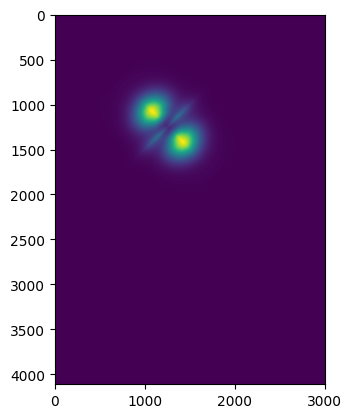

In [11]:
plt.imshow(image)

In [12]:
from multiprocessing import Pool
import functools

In [18]:
partial_create_and_diff = functools.partial(
    mode_decomposition.create_and_diff,
    rotate=45,
    scale=3,
    shift_x=500,
    shift_y=500,
    mode_1=mode_1,
    mode_2=mode_2,
    mode_3=mode_3,
    compare_image=image,
    final_dimensions=(4112, 3008)
)

In [19]:
list(map(partial_create_and_diff, points))

(0.0, 0.0, 0.0, 0.0, 0.0)
(0.0, 0.0, 0.0, 0.0, 3.141592653589793)
(0.0, 0.0, 0.0, 0.0, 6.283185307179586)
(0.0, 0.0, 0.0, 0.5, 0.0)
(0.0, 0.0, 0.0, 0.5, 3.141592653589793)
(0.0, 0.0, 0.0, 0.5, 6.283185307179586)
(0.0, 0.0, 0.0, 1.0, 0.0)
(0.0, 0.0, 0.0, 1.0, 3.141592653589793)
(0.0, 0.0, 0.0, 1.0, 6.283185307179586)
(0.0, 0.0, 3.141592653589793, 0.0, 0.0)
(0.0, 0.0, 3.141592653589793, 0.0, 3.141592653589793)
(0.0, 0.0, 3.141592653589793, 0.0, 6.283185307179586)
(0.0, 0.0, 3.141592653589793, 0.5, 0.0)
(0.0, 0.0, 3.141592653589793, 0.5, 3.141592653589793)
(0.0, 0.0, 3.141592653589793, 0.5, 6.283185307179586)
(0.0, 0.0, 3.141592653589793, 1.0, 0.0)
(0.0, 0.0, 3.141592653589793, 1.0, 3.141592653589793)
(0.0, 0.0, 3.141592653589793, 1.0, 6.283185307179586)
(0.0, 0.0, 6.283185307179586, 0.0, 0.0)
(0.0, 0.0, 6.283185307179586, 0.0, 3.141592653589793)
(0.0, 0.0, 6.283185307179586, 0.0, 6.283185307179586)
(0.0, 0.0, 6.283185307179586, 0.5, 0.0)
(0.0, 0.0, 6.283185307179586, 0.5, 3.1415926535897

[0.00048510934529184195,
 0.00048510934529184195,
 0.00048510934529184195,
 0.00040041899303729696,
 0.00040041899303729696,
 0.00040041899303729696,
 0.0011928108494595959,
 0.0011928108494595959,
 0.0011928108494595959,
 0.00048510934529184195,
 0.00048510934529184195,
 0.00048510934529184195,
 0.00040041899303729696,
 0.00040041899303729696,
 0.00040041899303729696,
 0.0011928108494595959,
 0.0011928108494595959,
 0.0011928108494595959,
 0.00048510934529184195,
 0.00048510934529184195,
 0.00048510934529184195,
 0.00040041899303729696,
 0.00040041899303729696,
 0.00040041899303729696,
 0.0011928108494595959,
 0.0011928108494595959,
 0.0011928108494595959,
 0.0001729194553508814,
 0.0001729194553508814,
 0.0001729194553508814,
 0.000226133292984769,
 0.00029559419949086284,
 0.000226133292984769,
 0.0023846019474490234,
 0.0007577171167178418,
 0.0023846019474490234,
 0.0001729194553508814,
 0.0001729194553508814,
 0.0001729194553508814,
 0.00029559419949086284,
 0.000226133292984769,

In [20]:
with Pool() as pool:
    N = pool.map(partial_create_and_diff, points)

print(N)

[0.00048510934529184195, 0.00048510934529184195, 0.00048510934529184195, 0.00040041899303729696, 0.00040041899303729696, 0.00040041899303729696, 0.0011928108494595959, 0.0011928108494595959, 0.0011928108494595959, 0.00048510934529184195, 0.00048510934529184195, 0.00048510934529184195, 0.00040041899303729696, 0.00040041899303729696, 0.00040041899303729696, 0.0011928108494595959, 0.0011928108494595959, 0.0011928108494595959, 0.00048510934529184195, 0.00048510934529184195, 0.00048510934529184195, 0.00040041899303729696, 0.00040041899303729696, 0.00040041899303729696, 0.0011928108494595959, 0.0011928108494595959, 0.0011928108494595959, 0.0001729194553508814, 0.0001729194553508814, 0.0001729194553508814, 0.000226133292984769, 0.00029559419949086284, 0.000226133292984769, 0.0023846019474490234, 0.0007577171167178418, 0.0023846019474490234, 0.0001729194553508814, 0.0001729194553508814, 0.0001729194553508814, 0.00029559419949086284, 0.000226133292984769, 0.00029559419949086284, 0.0007577171167